# PyTorch custom dataset

Used some datasets with PyTorch. Now using your own data. So custom datasets!!

## 0. Importing libs and device agnostic code

In [1]:
# Import required libs
import torch
from torch import nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [2]:
!nvidia-smi

Tue Jul  1 23:18:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Get Data

The dataset is a subset of Food101 dataset.

Foo101 has 101 different classes and 1000 images per class (750 train, 250 test images)

it start with 3 classes of food and only 10% of images.

Taking this dataset from github repo: `https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip`

In [3]:
# Get custom dataset
import requests
import zipfile
from pathlib import Path

# setup path to data folder to store data
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image path dosen't exis, download and prepare it
if image_path.is_dir():
  print(f"{image_path} directory exist. Skipping downalod.")
else:
  print(f"{image_path} directory dosen't exist, creating one.")
  image_path.mkdir(parents=True, exist_ok=True)

# Download the dataset
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading dataset")
  f.write(request.content)

# Unzip the dataset
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping dataset")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory dosen't exist, creating one.
Unzipping dataset


## 2. Preprocessing and exploring data

In [4]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir path returning its contents
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'


In [8]:
# Setup train and testing paths

train_dir = image_path / "train"
test_dir = image_path / "test"

PosixPath('data/pizza_steak_sushi/train')

### 2.1 Visualizing image

1. Get all of the image paths
2. Pick a random image path using python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with python images we will use PIL
5. We'll then show image and print metadata

Random Image Path: data/pizza_steak_sushi/train/sushi/3353428.jpg
Image class: sushi
Image height: 512
Image width: 512


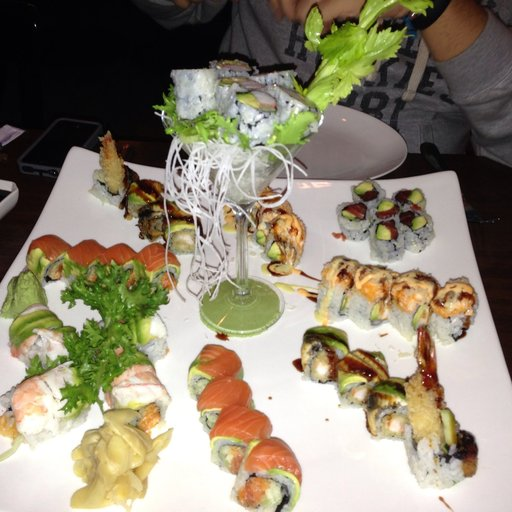

In [13]:

import random
from PIL import Image

# set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. picking random image to explore data
random_image_path = random.choice(image_path_list)
print(f"Random Image Path: {random_image_path}")

# 3. Get image class from path name (class is in path name - here sushi)
image_class = random_image_path.parent.stem
print(f"Image class: {image_class}")

# 4. Open Image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

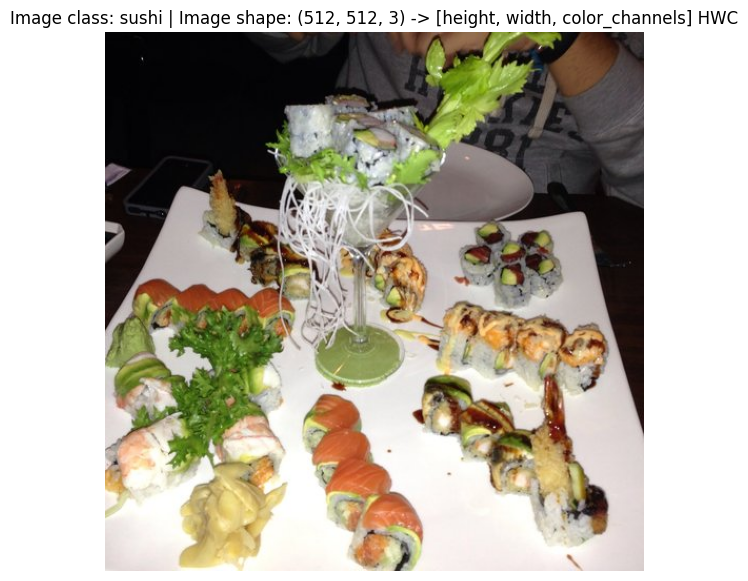

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Turn image into array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] HWC")
plt.axis(False)

In [ ]:
## 3.